<a href="https://colab.research.google.com/github/alouvre/MLT_DicodingSubmission_Proyek_Akhir_Sistem_Rekomedasi/blob/main/MLT_Submission_Proyek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir : Sistem Rekomendasi Destinasi Wisata di Indonesia

## **A. Domain Proyek**

### Latar Belakang



<br>

📚 Referensi:


## **B. Business Understanding**

### Problem Statements

Berdasarkan latar belakang di atas, berikut ini merupakan rincian masalah yang dapat diselesaikan pada proyek ini:

### Goals/Tujuan

### Solution Statement

Untuk mencapai tujuan proyek, dilakukan serangkaian pendekatan sebagai berikut:


---

## **1. Import Library yang Dibutuhkan**

In [ ]:
# !pip install lazypredict

In [2]:
# ==========================
# 🔗 Mount Google Drive & Navigasi ke Folder Proyek
# ==========================
from google.colab import drive
import os  # Untuk navigasi dan pengelolaan path
import shutil
import zipfile

# ==========================
# ⚙️ Konfigurasi Umum
# ==========================
import pandas as pd
import numpy as np
import random
import warnings

# Konfigurasi warning & seed
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

seed = 0
np.random.seed(seed)
random.seed(seed)

# ==========================
# 📊 Visualization
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 🧠 Machine Learning & Preprocessing
# ==========================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

# ==========================
# 🤖 Machine Learning Models
# ==========================
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# ==========================
# 📦 Utility Libraries
# ==========================
# from lazypredict.Supervised import LazyClassifier
from google.colab import files

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import numpy as np
import joblib

import kagglehub
import shutil
import os

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/MLT/Proyek_Akhir'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/MLT/Proyek_Akhir


## **2. Data Understanding**

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

### **2.1. Sumber Dataset**

Dataset yang digunakan pada proyek ini, yaitu dataset dengan judul `Indonesia Tourism Destination` yang diambil pada laman [Kaggle](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data). Dataset ini ditujukan untuk membangun sistem rekomendasi tempat wisata berdasarkan preferensi pengguna serta parameter seperti kota, harga, kategori, dan waktu. Dataset ini berisi data tempat wisata di `5 kota besar di Indonesia, yaitu Jakarta, Yogyakarta, Semarang, Bandung, dan Surabaya`. Dataset terdiri dari 4 file berformat `.csv`, yaitu:

1. `tourism_with_id.csv`
    Berisi informasi detail mengenai tempat wisata di lima kota besar Indonesia. Terdapat sekitar 400 tempat wisata unik.

    Kolom-kolom pada file ini antara lain:
    - `Place_Id` : ID unik untuk setiap tempat wisata.
    - `Place_Name` : Nama tempat wisata.
    - `Description` : Deskripsi singkat tentang tempat wisata.
    - `Category` : Kategori wisata (misalnya alam, budaya, hiburan).
    - `City` : Kota tempat wisata berada.
    - `Price` : Kisaran harga untuk mengunjungi tempat tersebut.
    - `Rating` : Rating rata-rata tempat wisata tersebut.
    - `Lat` dan `Long` : Koordinat geografis tempat wisata.

2. `user.csv`
    Berisi data dummy pengguna yang berguna untuk fitur rekomendasi berbasis pengguna.

    Kolom-kolom pada file ini:
    - `User_Id` : ID unik untuk setiap pengguna.
    - `User_Name` : Nama pengguna.

3. `tourism_rating.csv`
    Digunakan sebagai data interaksi antara pengguna dan tempat wisata, yang akan digunakan dalam sistem rekomendasi berbasis rating.

    Kolom-kolom pada file ini:
    - `User_Id` : ID pengguna yang memberikan rating.
    - `Place_Id` : ID tempat wisata yang diberi rating.
    - `Rating` : Nilai rating yang diberikan oleh pengguna terhadap tempat wisata.

### **2.2. Karakteristik Dataset**

Dataset berisi `4269 entri` dengan `13 kolom` yang mencakup berbagai informasi pribadi dari individu atau organisasi yang mengajukan pinjaman ke lembaga keuangan seperti bank. Berikut adalah rincian setiap kolom:

| Jenis      | Keterangan                                                                                     |
| ---------- | ---------------------------------------------------------------------------------------------- |
| Title      | Loan-Approval-Prediction-Dataset                                                               |
| Source     | [Kaggle](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data) |
| Maintainer | [A_Prabowo](https://www.kaggle.com/datasets/aprabowo)                                |
| License    | Data files © Original Authors                                                                                          |
| Visibility | Publik                                                                                         |
| Tags       | Beginner, Travel, Asia, Recommender Systems             |
| Usability  | 8.24                                                                                           |

### **2.3. Mengambil Data Dari Kaggle**

In [ ]:
# Path tujuan akhir di Google Drive
final_dir = "/content/drive/MyDrive/MLT/Proyek_Akhir/dataset"
os.makedirs(final_dir, exist_ok=True)

def download_kaggle_dataset_to_drive(dataset_id: str, target_dir: str):
    try:
        # Unduh dataset ke path default kagglehub
        source_path = kagglehub.dataset_download(dataset_id)
        print(f"✅ Dataset berhasil diunduh: {dataset_id}")
        print(f"📂 Lokasi awal: {source_path}")
        print("🔄 Memindahkan ke folder Google Drive...")

        # Pindahkan isi folder ke target_dir
        for filename in os.listdir(source_path):
            src = os.path.join(source_path, filename)
            dst = os.path.join(target_dir, filename)
            shutil.copy2(src, dst)

        print(f"✅ Dataset berhasil dipindahkan ke: {target_dir}")
        print("📌 Isi folder:", os.listdir(target_dir))

    except Exception as e:
        print(f"❌ Gagal download atau pindah dataset: {dataset_id}")
        print(f"📌 Error: {e}")

# Eksekusi
download_kaggle_dataset_to_drive("aprabowo/indonesia-tourism-destination", final_dir)

✅ Dataset berhasil diunduh: aprabowo/indonesia-tourism-destination
📂 Lokasi awal: /kaggle/input/indonesia-tourism-destination
🔄 Memindahkan ke folder Google Drive...
✅ Dataset berhasil dipindahkan ke: /content/drive/MyDrive/MLT/Proyek_Akhir/dataset
📌 Isi folder: ['user.csv', 'tourism_rating.csv', 'package_tourism.csv', 'tourism_with_id.csv']


### **2.4. Memuat Data**

In [4]:
# Path folder dataset
url = "/content/drive/MyDrive/MLT/Proyek_Akhir/dataset"

# Load keempat dataset ke dalam dataframe dengan nama yang informatif
df_tourism      = pd.read_csv(f"{url}/tourism_with_id.csv")          # Data wisata
df_users        = pd.read_csv(f"{url}/user.csv")                     # Data pengguna
df_ratings      = pd.read_csv(f"{url}/tourism_rating.csv")           # Rating antar user dan tempat
# df_packages     = pd.read_csv(f"{url}/package_tourism.csv")          # Rekomendasi paket

print('Jumlah data informasi tempat wisata ', len(df_tourism.Place_Id.unique()))
print('Jumlah data pengguna ', len(df_users.User_Id.unique()))
print('Jumlah data pengguna yang memberi rating', len(df_ratings.User_Id.unique()))
print('Jumlah total rating yang tercatat :', len(df_ratings))

Jumlah data informasi tempat wisata  437
Jumlah data pengguna  300
Jumlah data pengguna yang memberi rating 300
Jumlah total rating yang tercatat : 10000


In [5]:
df_tourism.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [6]:
df_users.head(2)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21


In [7]:
df_ratings.head(2)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2


## **3. Exploratory Data Analysis**

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

In [ ]:
# df_loan_eda = df_loan.copy()

### 3.1. EDA - Deskripsi Variabel

#### **Data Tourism**

In [8]:
# Menampilkan ringkasan informasi dari dataset
df_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 8 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `Place_Id`, `Price`, `Rating`, `Time_Minutes`, `Lat`, `Long`, `Unnamed: 11`, `Unnamed: 12`.
- Terdapat 5 kolom dengan tipe data `object` yaitu: `Place_Name`, `Description`, `Category`, `City`, `Coordinate`.

In [9]:
df_tourism.describe(include="all")

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437,437,437,437,437.000000,437.000000,205.000000,437,437.000000,437.000000,0.0,437.000000
unique,NaN,437,437,6,5,NaN,NaN,NaN,437,NaN,NaN,NaN,NaN
top,NaN,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Taman Hiburan,Yogyakarta,NaN,NaN,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",NaN,NaN,NaN,NaN
freq,NaN,1,1,135,126,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
mean,219.000000,NaN,NaN,NaN,NaN,24652.173913,4.442792,82.609756,NaN,-7.095438,109.160142,NaN,219.000000
std,126.295289,NaN,NaN,NaN,NaN,66446.374709,0.208587,52.872339,NaN,0.727241,1.962848,NaN,126.295289
min,1.000000,NaN,NaN,NaN,NaN,0.000000,3.400000,10.000000,NaN,-8.197894,103.931398,NaN,1.000000
25%,110.000000,NaN,NaN,NaN,NaN,0.000000,4.300000,45.000000,NaN,-7.749590,107.578369,NaN,110.000000
50%,219.000000,NaN,NaN,NaN,NaN,5000.000000,4.500000,60.000000,NaN,-7.020524,110.237468,NaN,219.000000
75%,328.000000,NaN,NaN,NaN,NaN,20000.000000,4.600000,120.000000,NaN,-6.829411,110.431869,NaN,328.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [10]:
df_tourism.shape

(437, 13)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 437 | 13 |

<br>

#### **Data User**

In [14]:
# Menampilkan ringkasan informasi dari dataset
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 2 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `User_Id` dan `Age`.
- Terdapat 1 kolom dengan tipe data `object` yaitu: `Location`.

In [16]:
df_users.describe(include="all")

,User_Id,Location,Age
count,300.000000,300,300.000000
unique,NaN,28,NaN
top,NaN,"Bekasi, Jawa Barat",NaN
freq,NaN,39,NaN
mean,150.500000,NaN,28.700000
std,86.746758,NaN,6.393716
min,1.000000,NaN,18.000000
25%,75.750000,NaN,24.000000
50%,150.500000,NaN,29.000000
75%,225.250000,NaN,34.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [17]:
df_users.shape

(300, 3)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 300 | 3 |

<br>

#### **Data Rating**

In [18]:
# Menampilkan ringkasan informasi dari dataset
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Dari eksekusi method `df_loan.info()` terdapat:

- Terdapat 3 kolom numerik dengan tipe data `int64` dan `float64` yaitu: `User_Id`, `Place_Id`, dan `Place_Ratings`.

In [19]:
df_ratings.describe(include="all")

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Fungsi `describe(include="all")` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah nilai non-null (tidak kosong) pada kolom tersebut. Berlaku untuk semua jenis data.
- `Mean` adalah nilai rata-rata. Hanya muncul pada kolom bertipe numerik.
- `Std` adalah standar deviasi (seberapa tersebar data dari rata-rata). Hanya muncul untuk kolom numerik.
- `Min` yaitu nilai minimum dari setiap kolom numerik.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum pada kolom numerik.
- `Unique` adalah	jumlah nilai unik (berbeda) dalam kolom. Hanya muncul untuk kolom kategorikal/objek.
- `Top` adalah nilai yang paling sering muncul (modus) dalam kolom kategorikal.
- `Freq` adalah frekuensi kemunculan nilai top. Berapa kali nilai tersebut muncul.

In [20]:
df_ratings.shape

(10000, 3)

Dari eksekusi method `df_tourism.shape` Terlihat:

| JUMLAH BARIS AWAL | JUMLAH KOLOM AWAL |
| ------ | ------ |
| 10000 | 3 |

<br>

### 3.2. EDA - Menghapus Kolom Yang Tidak Diperlukan

In [22]:
# Membuang kolom yang tidak dipakai
df_tourism = df_tourism.drop(['Unnamed: 11','Unnamed: 12'],axis=1)

# Setelah kolom 'Unnamed: 11','Unnamed: 12' di-drop
df_tourism.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


### 3.3. EDA - Menangani Missing Value

Penting untuk memastikan bahwa dataset yang digunakan berada dalam kondisi bersih. Dua hal utama yang perlu dicek dalam tahap awal ini adalah:
- Duplikasi Data – apakah terdapat baris data yang terduplikasi.
- Missing Values – apakah ada nilai kosong atau hilang yang dapat mempengaruhi kualitas analisis.

#### **Data Tourism**

In [23]:
print("Jumlah Duplikasi:", df_tourism.duplicated().sum())

Jumlah Duplikasi: 0


In [24]:
print("Memeriksa jumlah nilai yang hilang di setiap kolom:")
missing_values = df_tourism.isnull().sum()
missing_values

Memeriksa jumlah nilai yang hilang di setiap kolom:


,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [26]:
# Membuang kolom yang tidak dipakai

df_tourism = df_tourism.drop('Time_Minutes', axis=1)

In [27]:
print("Memeriksa kembali jumlah nilai yang hilang di setiap kolom:")
missing_values = df_tourism.isnull().sum()
missing_values

Memeriksa kembali jumlah nilai yang hilang di setiap kolom:


,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Coordinate,0
Lat,0
Long,0


Dapat disimpulkan bahwa dataframe `df_tourism` tidak memiliki nilai yang hilang dalam setiap kolomnya. Hal ini menunjukkan bahwa data yang tersedia cukup bersih dan siap untuk dianalisis lebih lanjut tanpa perlu dilakukan imputasi atau pembersihan tambahan terkait missing values.

#### **Data User**

In [28]:
print("Jumlah Duplikasi:", df_users.duplicated().sum())

Jumlah Duplikasi: 0


In [29]:
print("Memeriksa jumlah nilai yang hilang di setiap kolom:")
missing_values = df_users.isnull().sum()
missing_values

Memeriksa jumlah nilai yang hilang di setiap kolom:


,0
User_Id,0
Location,0
Age,0


Dapat disimpulkan bahwa dataframe `df_users` tidak memiliki nilai yang hilang dalam setiap kolomnya. Hal ini menunjukkan bahwa data yang tersedia cukup bersih dan siap untuk dianalisis lebih lanjut tanpa perlu dilakukan imputasi atau pembersihan tambahan terkait missing values.

#### **Data Rating**

In [30]:
print("Jumlah Duplikasi:", df_ratings.duplicated().sum())

Jumlah Duplikasi: 79


In [31]:
print("Memeriksa jumlah nilai yang hilang di setiap kolom:")
missing_values = df_ratings.isnull().sum()
missing_values

Memeriksa jumlah nilai yang hilang di setiap kolom:


,0
User_Id,0
Place_Id,0
Place_Ratings,0


Dapat disimpulkan bahwa dataframe `df_ratings` tidak memiliki nilai yang hilang dalam setiap kolomnya. Hal ini menunjukkan bahwa data yang tersedia cukup bersih dan siap untuk dianalisis lebih lanjut tanpa perlu dilakukan imputasi atau pembersihan tambahan terkait missing values.

### 3.5. Univariate Analysis

#### **3.5.1. Data Tourism**

#### Categorical Features

In [58]:
def plot_kategori(df, feature, warna='purple'):
    """
    Menampilkan jumlah dan persentase kategori serta plot batang dari suatu kolom kategorikal.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom kategorikal.
    warna (str): Warna untuk bar chart (default = 'orange').
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_summary = pd.DataFrame({
        'Jumlah Sampel': count,
        'Persentase (%)': percent.round(1)
    })

    print(f"\nRingkasan untuk kolom: {feature}")
    print(df_summary)
    print("\n")

    print("Visualisasi:")
    count.plot(kind='bar', title=feature, color=warna)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### **Fitur 1 - Category**


Ringkasan untuk kolom: Category
                    Jumlah Sampel  Persentase (%)
Category                                         
Taman Hiburan                 135            30.9
Budaya                        117            26.8
Cagar Alam                    106            24.3
Bahari                         47            10.8
Tempat Ibadah                  17             3.9
Pusat Perbelanjaan             15             3.4


Visualisasi:


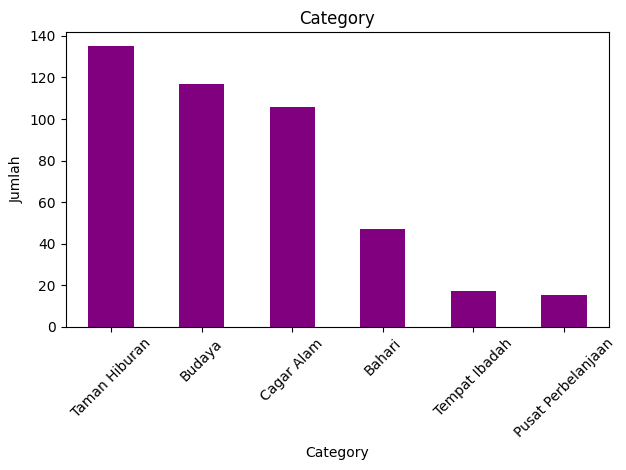

In [59]:
plot_kategori(df_tourism, 'Category')

##### **Fitur 2 - City**


Ringkasan untuk kolom: City
            Jumlah Sampel  Persentase (%)
City                                     
Yogyakarta            126            28.8
Bandung               124            28.4
Jakarta                84            19.2
Semarang               57            13.0
Surabaya               46            10.5


Visualisasi:


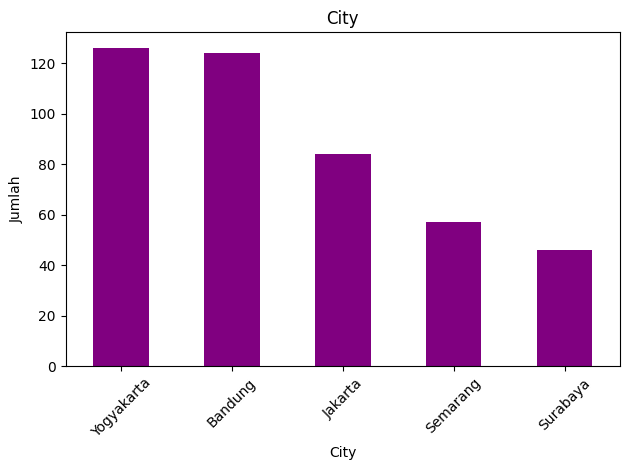

In [62]:
plot_kategori(df_tourism, 'City')

##### **Fitur 4 - Place_Name**


 Ringkasan 10 Tempat Wisata dengan Rating Terbanyak:
                                  Place_Name  Rating_Count  Persentase (%)
0                             Gunung Lalakon            39             0.4
1                        Pantai Parangtritis            39             0.4
2  Gereja Perawan Maria Tak Berdosa Surabaya            38             0.4
3                             Pantai Kesirat            37             0.4
4                         Taman Sungai Mudal            36             0.4
5                    Kampung Batu Malakasari            34             0.3
6              Geoforest Watu Payung Turunan            34             0.3
7                            Grand Maerakaca            33             0.3
8                                 Taman Film            33             0.3
9                       NuArt Sculpture Park            33             0.3




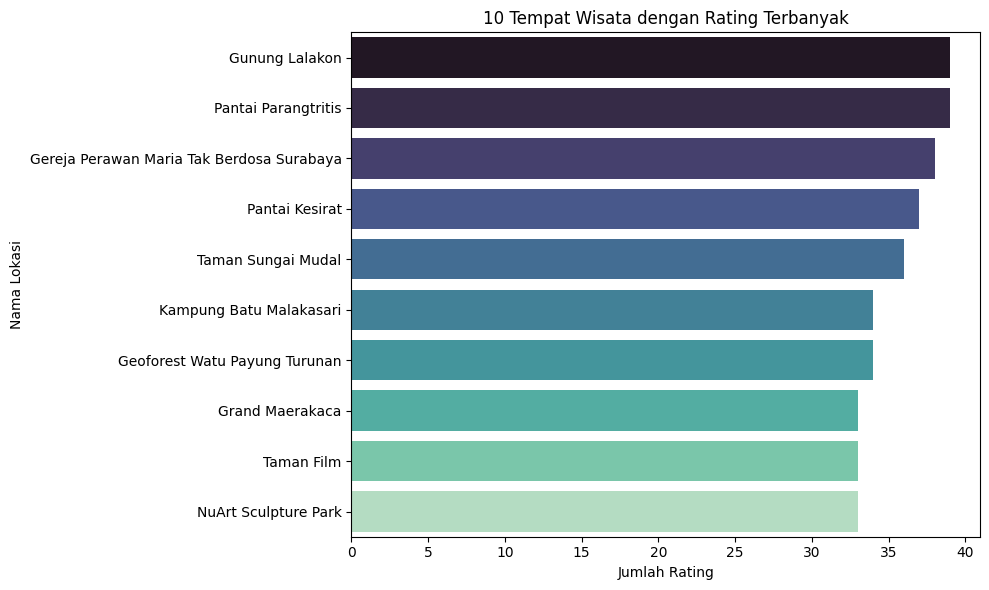

In [64]:
# Hitung jumlah rating untuk setiap Place_Id
top_10 = df_ratings['Place_Id'].value_counts().reset_index()[0:10]
# Ganti nama kolom biar jelas
top_10.columns = ['Place_Id', 'Rating_Count']
# Gabungkan dengan nama tempat dari df_tourism
top_10 = pd.merge(top_10, df_tourism[['Place_Id', 'Place_Name']], on='Place_Id', how='left')

# Hitung persentase
total_rating = df_ratings['Place_Id'].count()
top_10['Persentase (%)'] = round(100 * top_10['Rating_Count'] / total_rating, 1)

# Tampilkan ringkasan
print("\n Ringkasan 10 Tempat Wisata dengan Rating Terbanyak:")
print(top_10[['Place_Name', 'Rating_Count', 'Persentase (%)']])
print("\n")

# Visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(10,6))
sns.barplot(x='Rating_Count', y='Place_Name', data=top_10, palette='mako')
plt.title('10 Tempat Wisata dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Lokasi')
plt.tight_layout()
plt.show()

#### Numerical Features

##### **Fitur 1 - Rating**


Ringkasan untuk kolom: Rating
        Jumlah Sampel  Persentase (%)
Rating                               
4.5                98            22.4
4.4                98            22.4
4.6                75            17.2
4.3                47            10.8
4.7                37             8.5
4.2                20             4.6
4.1                20             4.6
4.0                18             4.1
4.8                10             2.3
5.0                 4             0.9
4.9                 4             0.9
3.9                 3             0.7
3.8                 2             0.5
3.4                 1             0.2


Visualisasi:


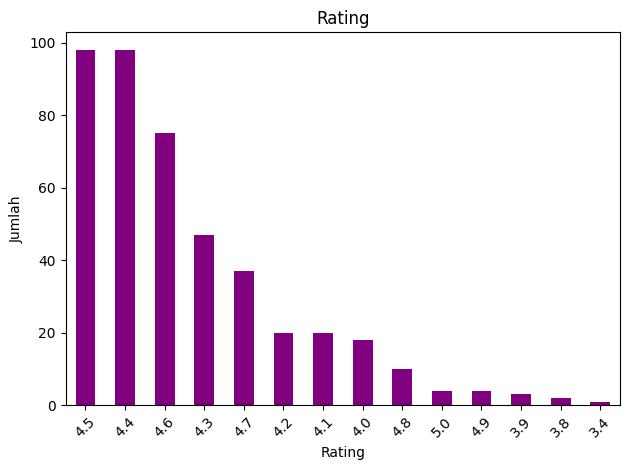

In [66]:
plot_kategori(df_tourism, 'Rating')

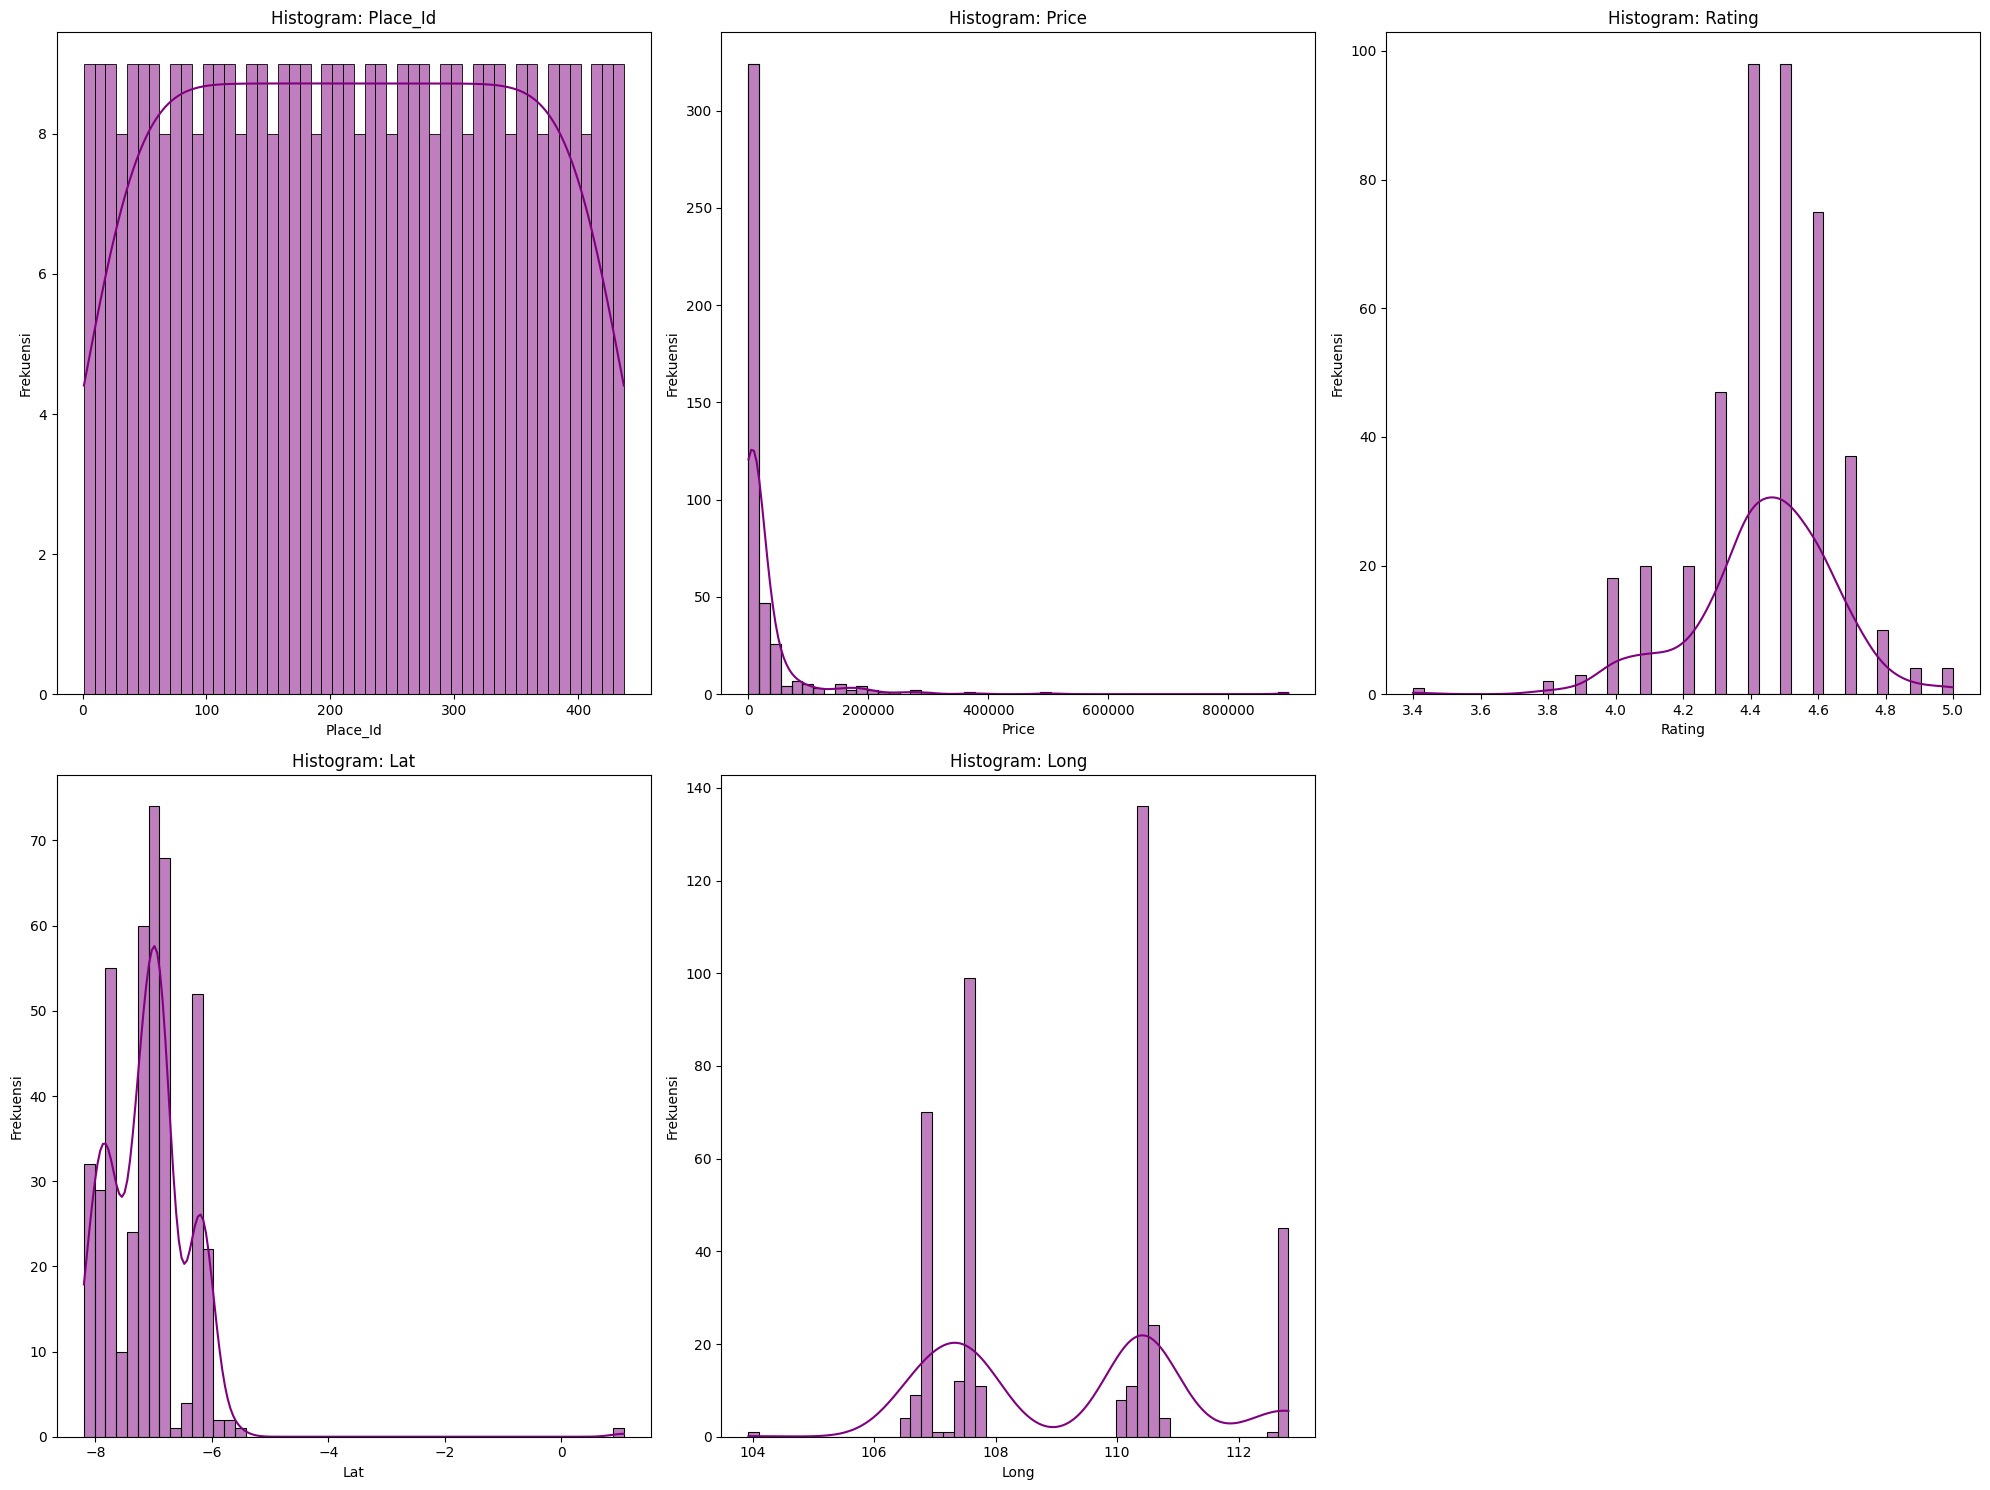

In [63]:
def plot_histogram_semua_kolom(df, bins=50, figsize=(20, 15), color='purple'):
    """
    Menampilkan histogram dari semua kolom numerik di dalam dataframe menggunakan seaborn.histplot.

    Parameters:
    df (DataFrame): DataFrame yang akan diplot.
    bins (int): Jumlah bin pada histogram.
    figsize (tuple): Ukuran figure.
    color (str): Warna histogram.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3 kolom per baris

    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, 3, i)
        sns.histplot(df[col], bins=bins, kde=True, color=color)
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.tight_layout()
    plt.show()

plot_histogram_semua_kolom(df_tourism)